In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Churn_Modelling.csv')
data.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [3]:
x = data.iloc[:,3:-1]
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [4]:
y = data.iloc[:,-1]

y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

### First of all we need to change the categorical features to numerical features

In [5]:
geography = pd.get_dummies(x['Geography'], drop_first= True)

gender = pd.get_dummies(x['Gender'], drop_first= True)

In [6]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [7]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


### We need to add those dummies columns to our x data frame

In [8]:
x = pd.concat([x,gender,geography], axis= 1)
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1


In [9]:
## We need to drop the original geography & gender column

x = x.drop(["Geography","Gender"], axis =1)

x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state= 0, test_size=0.3)

In [12]:
## import standard_scaler 

from sklearn.preprocessing import StandardScaler

In [13]:
sc = StandardScaler()

In [14]:
x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)

In [15]:
x_train

array([[-0.09792126, -0.55759842, -1.03635146, ...,  0.92295821,
        -0.56987189, -0.5731713 ],
       [-1.12612023,  0.01725942,  0.69700901, ...,  0.92295821,
        -0.56987189, -0.5731713 ],
       [-0.62230274,  3.5622161 ,  0.00366482, ..., -1.08347268,
        -0.56987189, -0.5731713 ],
       ...,
       [ 0.89943174, -0.36597914,  0.00366482, ...,  0.92295821,
        -0.56987189, -0.5731713 ],
       [-0.62230274, -0.07855022,  1.39035319, ..., -1.08347268,
        -0.56987189,  1.74467913],
       [-0.28299708,  0.87954618, -1.38302356, ..., -1.08347268,
         1.75478035, -0.5731713 ]])

In [16]:
x_test

array([[-0.55032881, -0.36597914,  1.0436811 , ..., -1.08347268,
         1.75478035, -0.5731713 ],
       [-1.31119605,  0.11306906, -1.03635146, ..., -1.08347268,
        -0.56987189, -0.5731713 ],
       [ 0.57040807,  0.30468834,  1.0436811 , ..., -1.08347268,
        -0.56987189,  1.74467913],
       ...,
       [ 0.35448628,  0.11306906, -1.03635146, ...,  0.92295821,
        -0.56987189, -0.5731713 ],
       [ 0.42646021,  2.89154862,  1.73702529, ...,  0.92295821,
        -0.56987189, -0.5731713 ],
       [ 0.82745781,  0.97535582, -0.34300727, ..., -1.08347268,
         1.75478035, -0.5731713 ]])

In [31]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam

In [32]:
model = Sequential([Dense(units= 6,input_dim =11, activation= 'relu',kernel_initializer= 'he_uniform'),
                   Dense(6, activation= 'relu',kernel_initializer= 'he_uniform'),
                   Dense(1, activation= 'sigmoid',kernel_initializer= 'glorot_uniform')])

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 6)                 72        
                                                                 
 dense_7 (Dense)             (None, 6)                 42        
                                                                 
 dense_8 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [35]:
model_history = model.fit(x_train,y_train, validation_split= 0.33, batch_size =10, epochs =100)

Epoch 1/100
469/469 [==============================] - 2s 3ms/step - loss: 0.6636 - accuracy: 0.6353 - val_loss: 0.5188 - val_accuracy: 0.7888
Epoch 2/100
469/469 [==============================] - 1s 3ms/step - loss: 0.4914 - accuracy: 0.7997 - val_loss: 0.4756 - val_accuracy: 0.8018
Epoch 3/100
469/469 [==============================] - 1s 3ms/step - loss: 0.4605 - accuracy: 0.8066 - val_loss: 0.4590 - val_accuracy: 0.8048
Epoch 4/100
469/469 [==============================] - 1s 3ms/step - loss: 0.4429 - accuracy: 0.8104 - val_loss: 0.4502 - val_accuracy: 0.8087
Epoch 5/100
469/469 [==============================] - 1s 3ms/step - loss: 0.4315 - accuracy: 0.8138 - val_loss: 0.4440 - val_accuracy: 0.8139
Epoch 6/100
469/469 [==============================] - 1s 3ms/step - loss: 0.4234 - accuracy: 0.8168 - val_loss: 0.4379 - val_accuracy: 0.8122
Epoch 7/100
469/469 [==============================] - 1s 3ms/step - loss: 0.4164 - accuracy: 0.8189 - val_loss: 0.4327 - val_accuracy: 0.8152

Epoch 58/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3402 - accuracy: 0.8565 - val_loss: 0.3758 - val_accuracy: 0.8473
Epoch 59/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3399 - accuracy: 0.8554 - val_loss: 0.3757 - val_accuracy: 0.8477
Epoch 60/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3391 - accuracy: 0.8586 - val_loss: 0.3786 - val_accuracy: 0.8464
Epoch 61/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3395 - accuracy: 0.8556 - val_loss: 0.3752 - val_accuracy: 0.8490
Epoch 62/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3389 - accuracy: 0.8575 - val_loss: 0.3758 - val_accuracy: 0.8481
Epoch 63/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3389 - accuracy: 0.8575 - val_loss: 0.3751 - val_accuracy: 0.8486
Epoch 64/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3390 - accuracy: 0.8588 - val_loss: 0.3734 - val_accuracy:

In [36]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


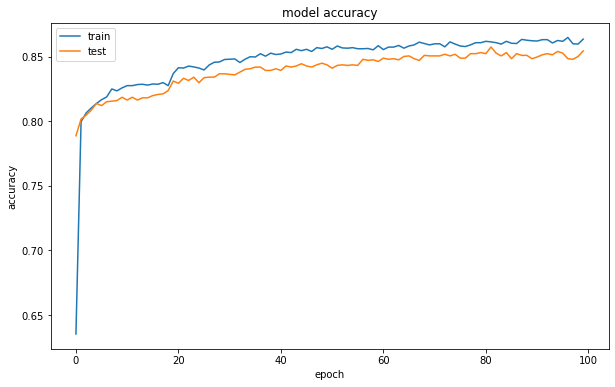

In [40]:
plt.figure(figsize=(10,6))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

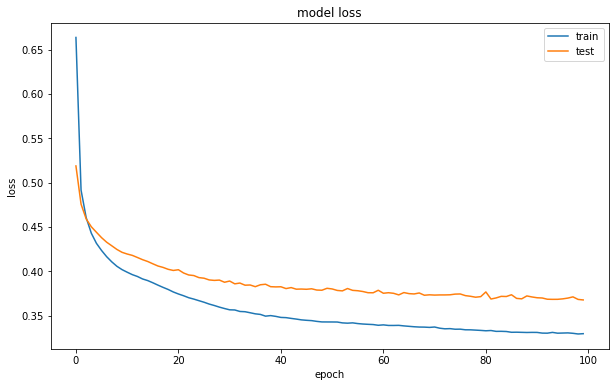

In [42]:
plt.figure(figsize=(10,6))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc = 'upper right')
plt.show()

In [47]:
y_pred = model.predict(x_test)

y_pred = (y_pred > 0.5)

94/94 [==============================] - 0s 2ms/step


In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[2251,  128],
       [ 298,  323]], dtype=int64)

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
acc = accuracy_score(y_test,y_pred)
acc

0.858